<a href="https://colab.research.google.com/github/nisaakan/DSA210-Project/blob/main/DSA210_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DSA210 Project - Mental Health & Technology Usage Project

Data Collection

*   In this project, the dataset "Mental Health and Technology Usage 2024" was uploaded locally as a .csv file. It was loaded using Python’s pandas library to prepare it for analysis, including cleaning,
visualization, and modeling.
*   Source: Kaggle(https://www.kaggle.com/datasets/waqi786/mental-health-and-technology-usage-dataset)







In [84]:
# File upload (Google Colab)
from google.colab import files
uploaded = files.upload()

Saving mental_health_and_technology_usage_2024.csv to mental_health_and_technology_usage_2024 (5).csv


In [85]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay

In [86]:
# Load CSV file
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

# Data Overview
print("First 5 rows of the dataset:")
display(data.head())
print("\nDataset Info:")
data.info()
print("\nDescriptive Statistics:")
display(data.describe())

# Missing Value Handling
print("\nMissing value count:")
print(data.isnull().sum())

for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)


First 5 rows of the dataset:


,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Technology_Usage_Hours    10000 non-null  float64
 4   Social_Media_Usage_Hours  10000 non-null  float64
 5   Gaming_Hours              10000 non-null  float64
 6   Screen_Time_Hours         10000 non-null  float64
 7   Mental_Health_Status      10000 non-null  object 
 8   Stress_Level              10000 non-null  object 
 9   Sleep_Hours               10000 non-null  float64
 10  Physical_Activity_Hours   10000 non-null  float64
 11  Support_Systems_Access    10000 non-null  object 
 12  Work_Environment_Impact   10000 non-null  object 
 13  Online_Support_Usage      10000 non-null  objec

,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000



Missing value count:
User_ID                     0
Age                         0
Gender                      0
Technology_Usage_Hours      0
Social_Media_Usage_Hours    0
Gaming_Hours                0
Screen_Time_Hours           0
Mental_Health_Status        0
Stress_Level                0
Sleep_Hours                 0
Physical_Activity_Hours     0
Support_Systems_Access      0
Work_Environment_Impact     0
Online_Support_Usage        0
dtype: int64


<ipython-input-86-b3deb6100e81>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-86-b3deb6100e81>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [87]:
## Feature Engineering

# Numeric stress level
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
data['Stress_Level_Numeric'] = data['Stress_Level'].map(stress_map)

# Average tech + screen time
data['Avg_Tech_Screen'] = (data['Technology_Usage_Hours'] + data['Screen_Time_Hours']) / 2

# Binary flag: High stress = 1 if stress level is high
data['High_Stress'] = data['Stress_Level_Numeric'].apply(lambda x: 1 if x == 3 else 0)

# Screen time bucket
def bucket_screen_time(x):
    if x < 2:
        return 'Low'
    elif x <= 6:
        return 'Medium'
    else:
        return 'High'

data['ScreenTime_Level'] = data['Screen_Time_Hours'].apply(bucket_screen_time)

# Ratio feature
data['ScreenTime_to_Sleep'] = data['Screen_Time_Hours'] / (data['Sleep_Hours'] + 1e-5)


In [88]:
# Dummy variables
# Check and encode categorical columns if they exist
if 'Gender' in data.columns:
    gender_encoded = pd.get_dummies(data['Gender'], prefix='Gender')
    data = pd.concat([data, gender_encoded], axis=1)
else:
    print("Column 'Gender' not found.")

if 'Mental_Health_Status' in data.columns:
    mental_encoded = pd.get_dummies(data['Mental_Health_Status'], prefix='Mental')
    data = pd.concat([data, mental_encoded], axis=1)
else:
    print("Column 'Mental_Health_Status' not found.")

if 'Support_Systems_Access' in data.columns:
    support_encoded = pd.get_dummies(data['Support_Systems_Access'], prefix='Support')
    data = pd.concat([data, support_encoded], axis=1)
else:
    print("Column 'Support_Systems_Access' not found.")

if 'Work_Environment_Impact' in data.columns:
    work_encoded = pd.get_dummies(data['Work_Environment_Impact'], prefix='Work')
    data = pd.concat([data, work_encoded], axis=1)
else:
    print("Column 'Work_Environment_Impact' not found.")

if 'Online_Support_Usage' in data.columns:
    online_encoded = pd.get_dummies(data['Online_Support_Usage'], prefix='Online')
    data = pd.concat([data, online_encoded], axis=1)
else:
    print("Column 'Online_Support_Usage' not found.")


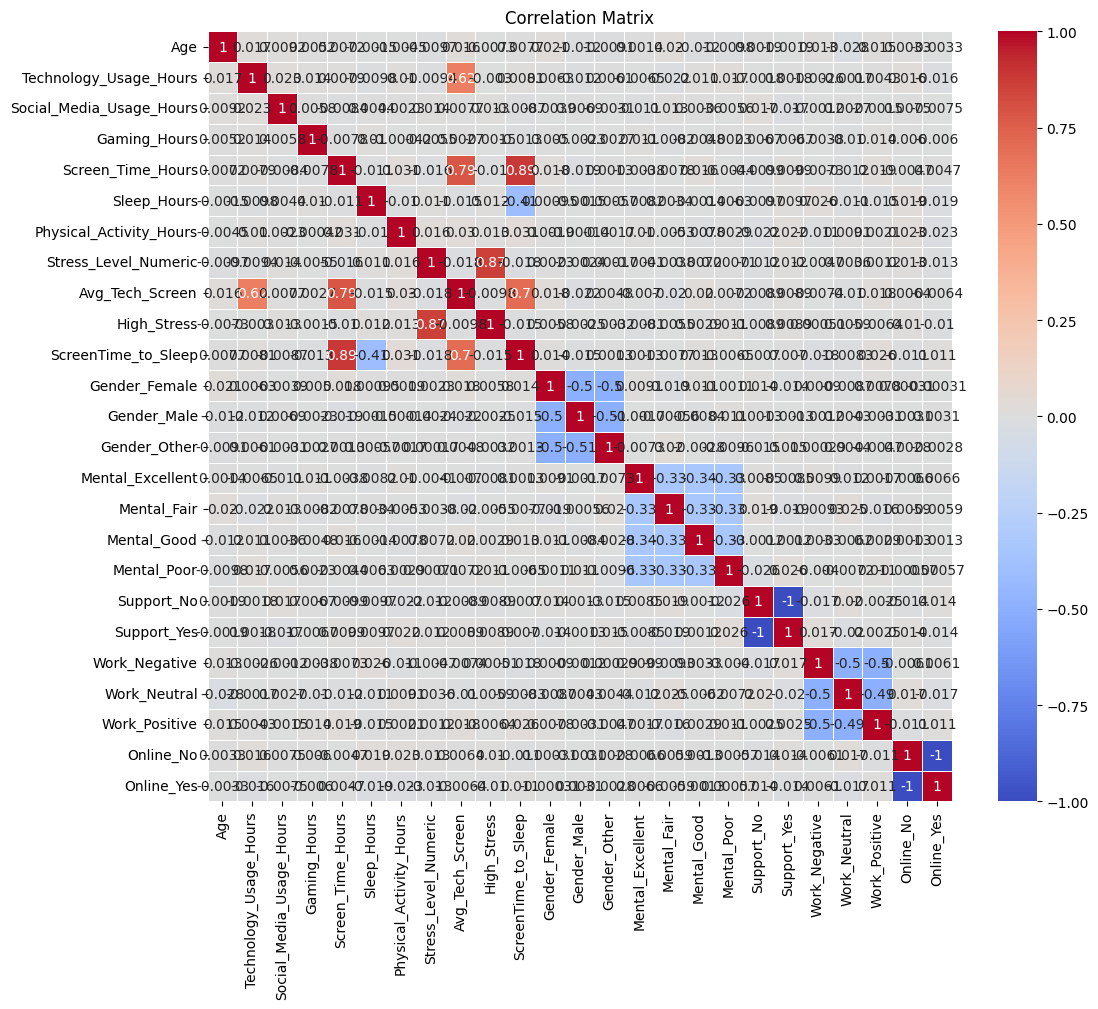

In [89]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


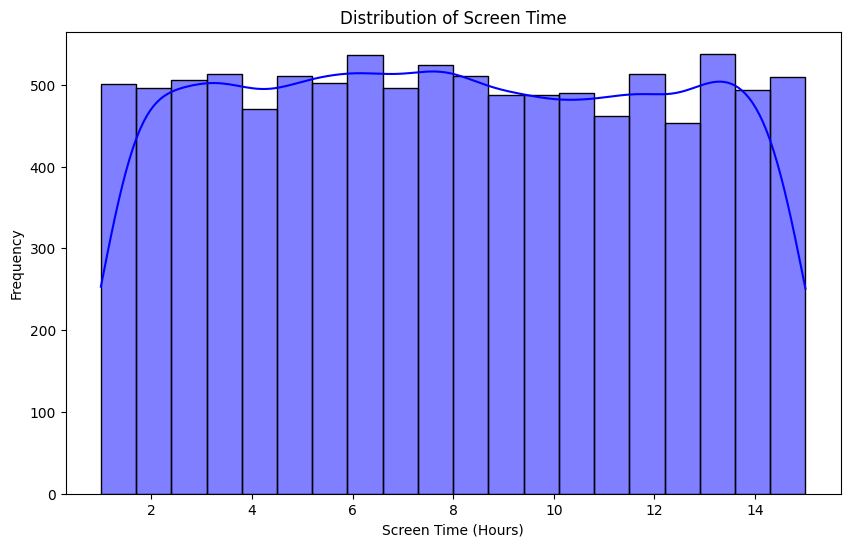

Screen Time Statistics:
Mean: 7.98 hrs
Median: 7.90 hrs
Mode: 11.78 hrs


<ipython-input-90-90ff9f0900e3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mental_Health_Status', data=data, palette='pastel')


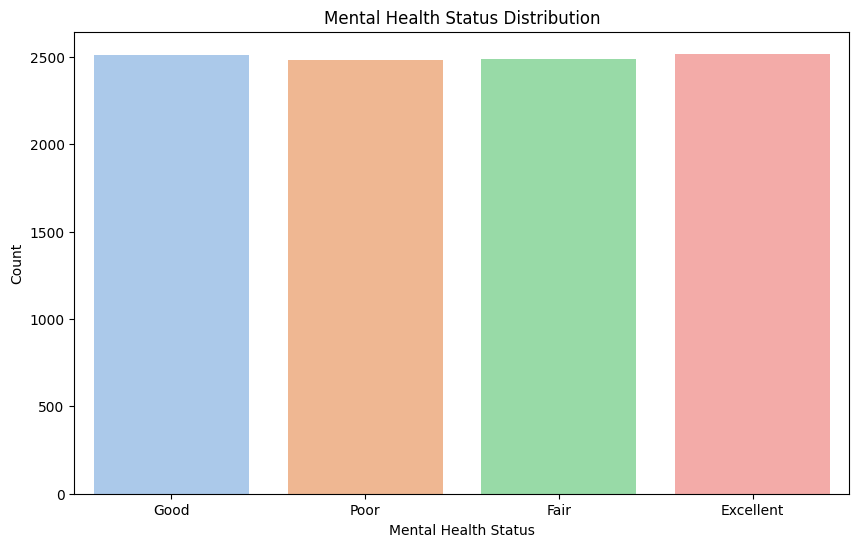

<ipython-input-90-90ff9f0900e3>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stress_Level', data=data, palette='muted')


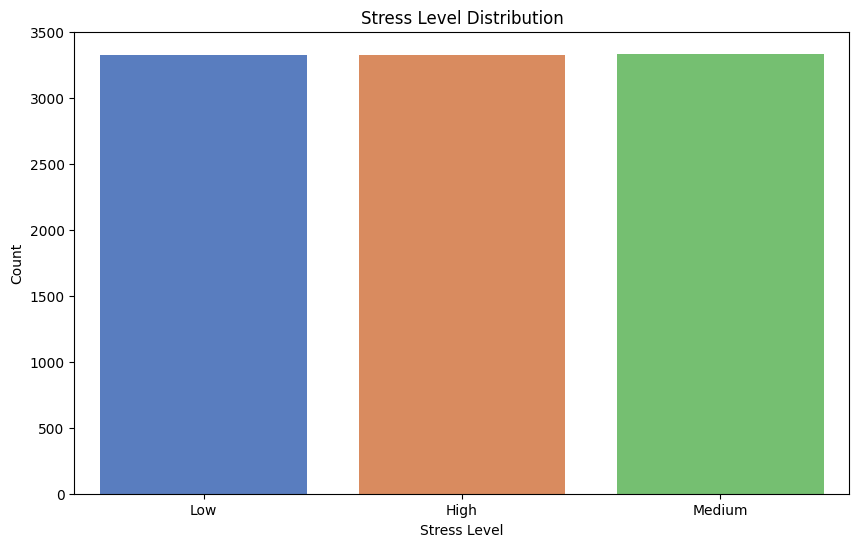

In [90]:
## Univariate Analysis

# Histogram of Screen Time
plt.figure(figsize=(10, 6))
sns.histplot(data['Screen_Time_Hours'], kde=True, bins=20, color='blue')
plt.title("Distribution of Screen Time")
plt.xlabel("Screen Time (Hours)")
plt.ylabel("Frequency")
plt.show()

# Summary statistics
print("Screen Time Statistics:")
print(f"Mean: {data['Screen_Time_Hours'].mean():.2f} hrs")
print(f"Median: {data['Screen_Time_Hours'].median():.2f} hrs")
print(f"Mode: {data['Screen_Time_Hours'].mode()[0]:.2f} hrs")

# Count plot for Mental Health Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Mental_Health_Status', data=data, palette='pastel')
plt.title("Mental Health Status Distribution")
plt.xlabel("Mental Health Status")
plt.ylabel("Count")
plt.show()

# Count plot for Stress Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress_Level', data=data, palette='muted')
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()


<ipython-input-91-1cd167007cc0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level', y='Screen_Time_Hours', data=data, palette='Set2')


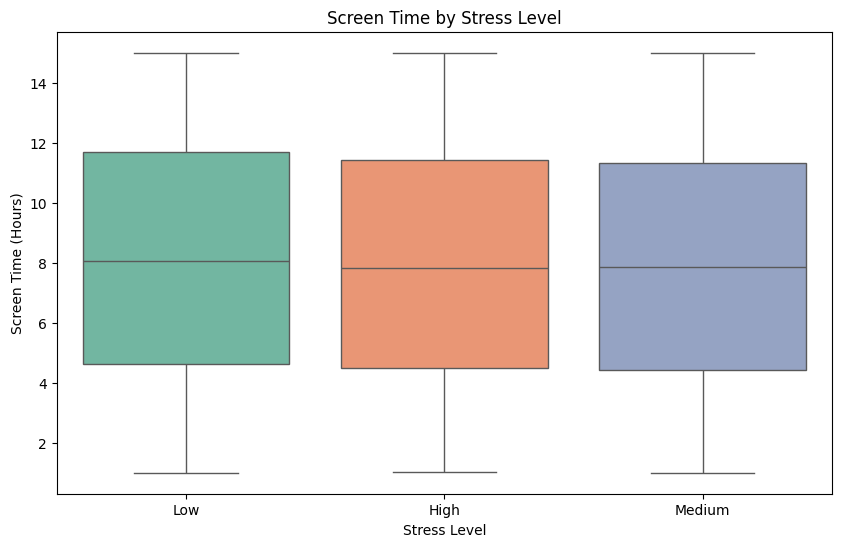

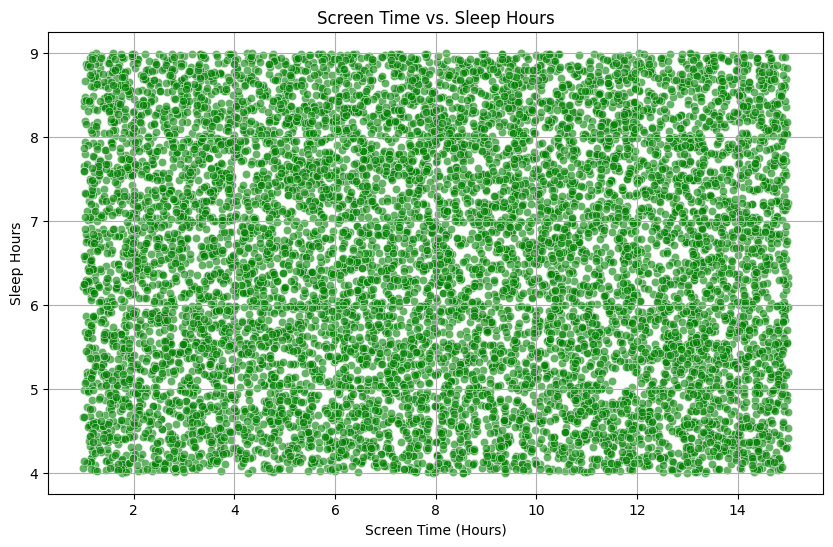

<ipython-input-91-1cd167007cc0>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level', y='Physical_Activity_Hours', data=data, palette='coolwarm')


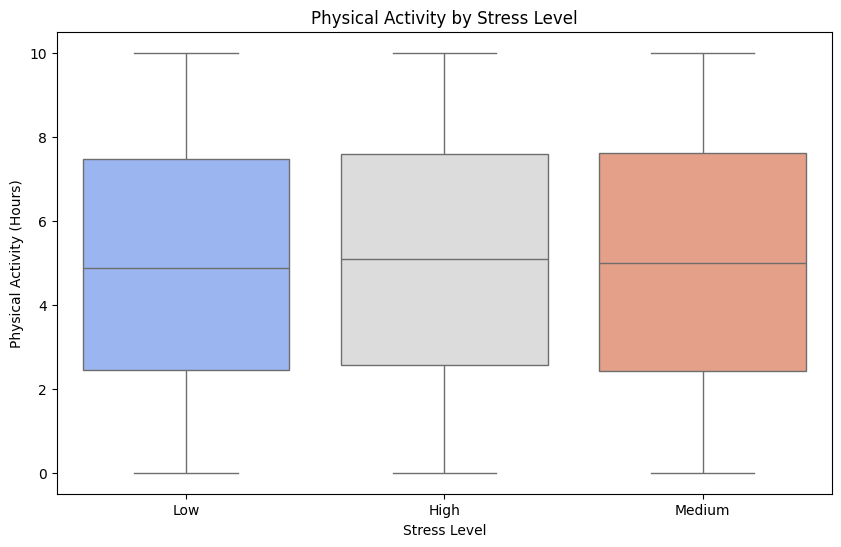

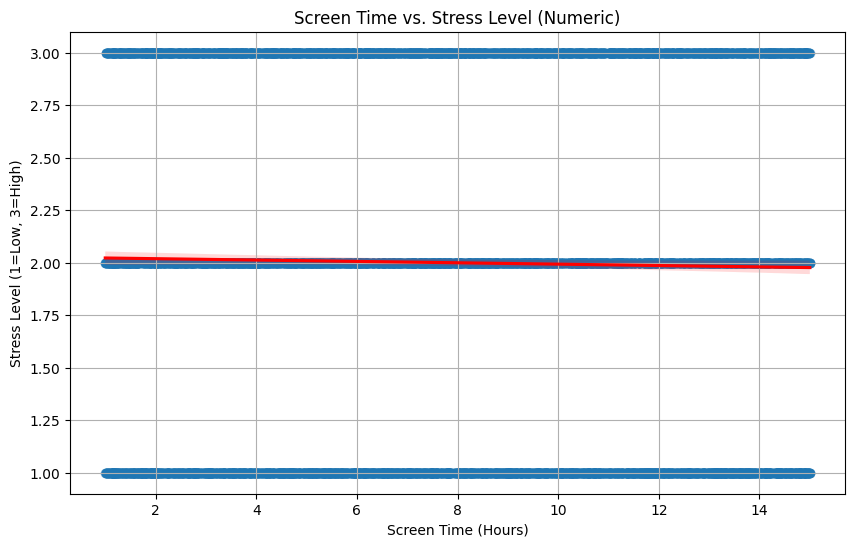

<ipython-input-91-1cd167007cc0>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='ScreenTime_Level', y='Sleep_Hours', data=data, palette='pastel')


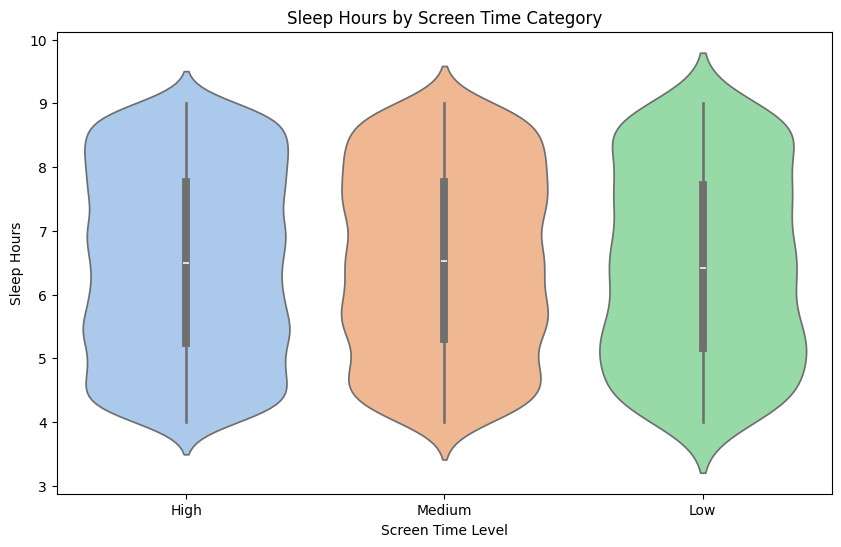

In [91]:
## Bivariate Analysis

# Boxplot: Screen Time by Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Screen_Time_Hours', data=data, palette='Set2')
plt.title("Screen Time by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Screen Time (Hours)")
plt.show()

# Scatterplot: Screen Time vs. Sleep Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen_Time_Hours', y='Sleep_Hours', data=data, alpha=0.6, color='green')
plt.title("Screen Time vs. Sleep Hours")
plt.xlabel("Screen Time (Hours)")
plt.ylabel("Sleep Hours")
plt.grid(True)
plt.show()

# Boxplot: Physical Activity by Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress_Level', y='Physical_Activity_Hours', data=data, palette='coolwarm')
plt.title("Physical Activity by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Physical Activity (Hours)")
plt.show()

# Scatterplot with trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Screen_Time_Hours', y='Stress_Level_Numeric', data=data,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title("Screen Time vs. Stress Level (Numeric)")
plt.xlabel("Screen Time (Hours)")
plt.ylabel("Stress Level (1=Low, 3=High)")
plt.grid(True)
plt.show()

# Violin plot: Sleep Hours by Screen Time Level
plt.figure(figsize=(10, 6))
sns.violinplot(x='ScreenTime_Level', y='Sleep_Hours', data=data, palette='pastel')
plt.title("Sleep Hours by Screen Time Category")
plt.xlabel("Screen Time Level")
plt.ylabel("Sleep Hours")
plt.show()


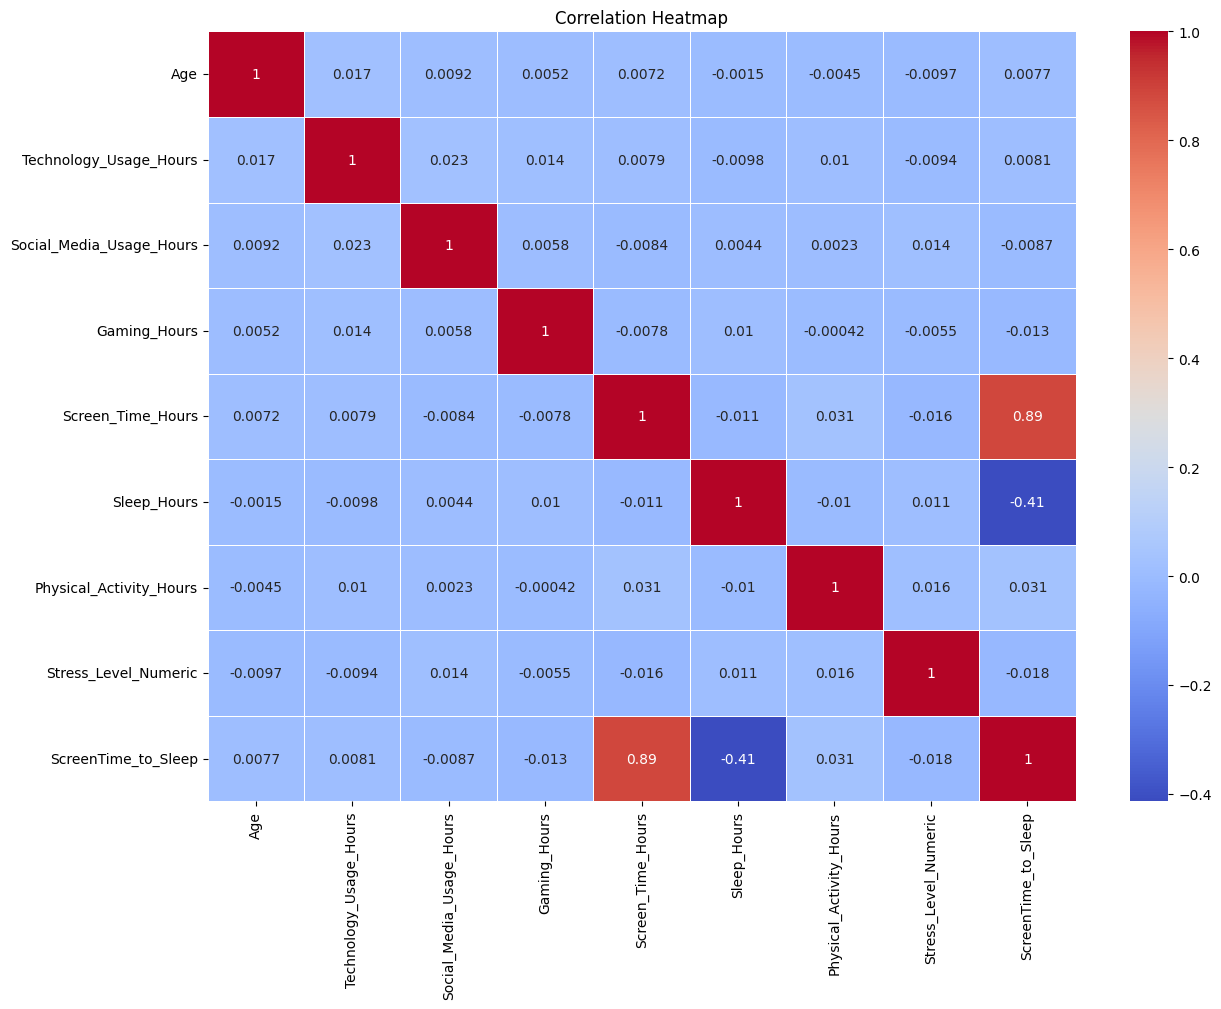

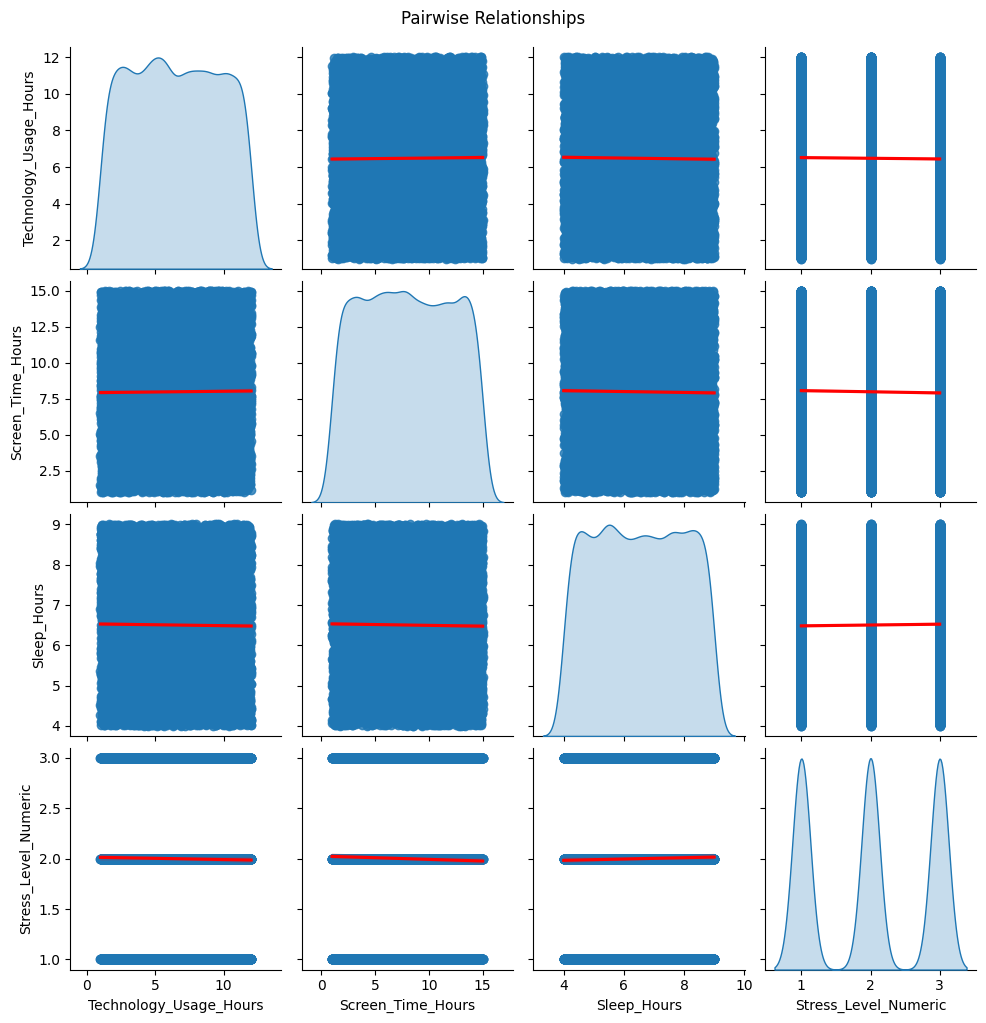

In [92]:
## Multivariate Analysis

# Select relevant numeric columns for correlation
corr_cols = [
    'Age', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours',
    'Screen_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours',
    'Stress_Level_Numeric', 'ScreenTime_to_Sleep'
]

# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data[corr_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot with regression lines
sns.pairplot(
    data[['Technology_Usage_Hours', 'Screen_Time_Hours', 'Sleep_Hours', 'Stress_Level_Numeric']],
    diag_kind='kde',
    kind='reg',
    plot_kws={'line_kws': {'color': 'red'}}
)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [93]:
# Statistical Analysis (OLS Regression)
X_ols = sm.add_constant(data['Screen_Time_Hours'])
y_ols = data['Sleep_Hours']
model = sm.OLS(y_ols, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Sleep_Hours   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.250
Date:                Fri, 23 May 2025   Prob (F-statistic):              0.264
Time:                        22:07:20   Log-Likelihood:                -17910.
No. Observations:               10000   AIC:                         3.582e+04
Df Residuals:                    9998   BIC:                         3.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.5327      0.03

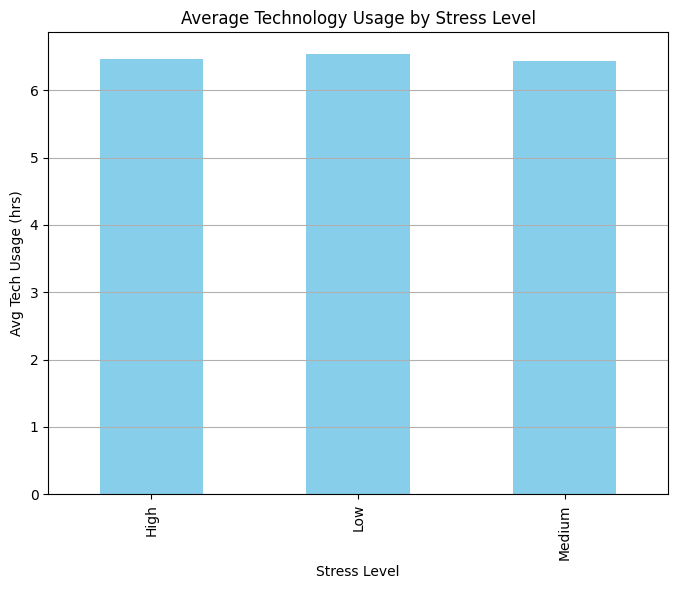

In [94]:
# Grouped Analysis
stress_usage = data.groupby('Stress_Level')['Technology_Usage_Hours'].mean()
plt.figure(figsize=(8, 6))
stress_usage.plot(kind='bar', color='skyblue')
plt.title('Average Technology Usage by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Avg Tech Usage (hrs)')
plt.grid(axis='y')
plt.show()

Linear Regression:
 - MSE: 0.68
 - R²: -0.00


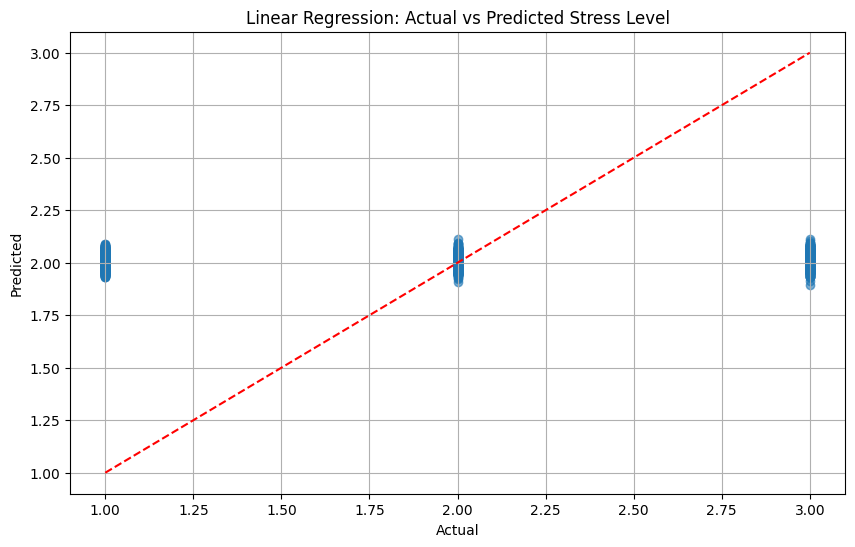

Decision Tree:
 - MSE: 1.28
 - R²: -0.91


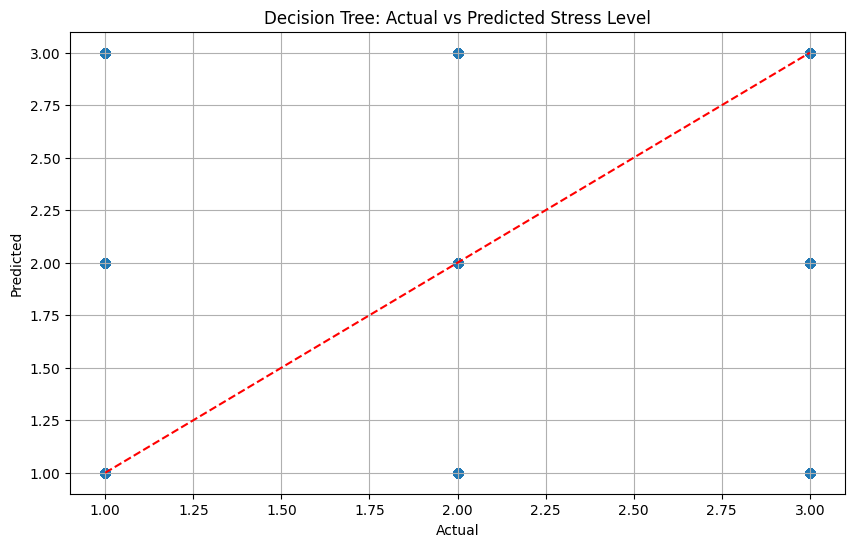

Random Forest:
 - MSE: 0.69
 - R²: -0.03


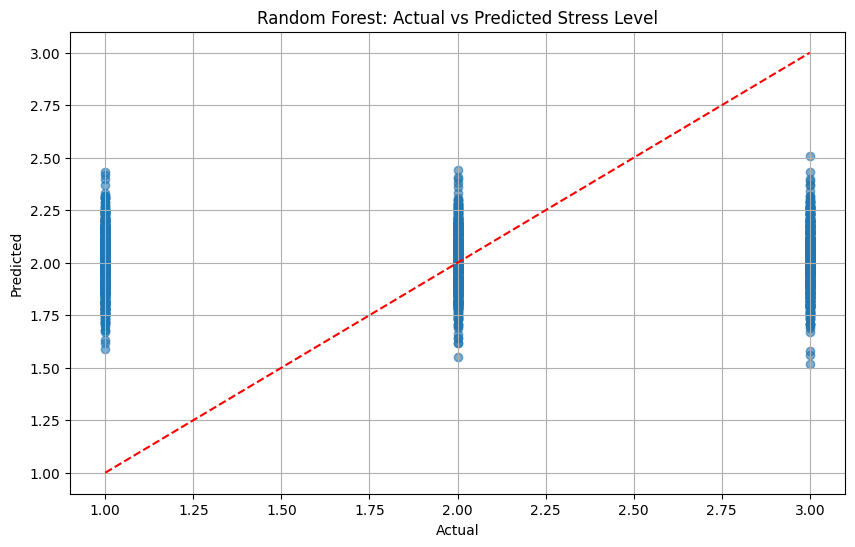


Best Model: Linear Regression (R² = -0.00)

Pearson Correlation: -0.01
P-Value: 0.2636
No statistically significant relationship.


In [95]:
# Features list
X_columns = ['Technology_Usage_Hours', 'Social_Media_Usage_Hours', 'Gaming_Hours',
             'Screen_Time_Hours', 'Sleep_Hours', 'Physical_Activity_Hours', 'Age']

# Add encoded dummy variable columns only if they exist
if 'gender_encoded' in locals():
    X_columns += list(gender_encoded.columns)
if 'mental_encoded' in locals():
    X_columns += list(mental_encoded.columns)
if 'support_encoded' in locals():
    X_columns += list(support_encoded.columns)
if 'work_encoded' in locals():
    X_columns += list(work_encoded.columns)
if 'online_encoded' in locals():
    X_columns += list(online_encoded.columns)

# Define features and target
X = data[X_columns]
y = data['Stress_Level_Numeric']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}

    print(f"{name}:\n - MSE: {mse:.2f}\n - R²: {r2:.2f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f"{name}: Actual vs Predicted Stress Level")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.show()

# Identify the best model based on R²
best_model = max(results, key=lambda x: results[x]['R²'])
print(f"\nBest Model: {best_model} (R² = {results[best_model]['R²']:.2f})")

# Pearson Correlation
corr, p_val = pearsonr(data['Screen_Time_Hours'], data['Sleep_Hours'])
print(f"\nPearson Correlation: {corr:.2f}")
print(f"P-Value: {p_val:.4f}")
if p_val < 0.05:
    print("Statistically significant relationship.")
else:
    print("No statistically significant relationship.")


In [96]:
# Hypothesis Testing Explanation and Correlation Test
print("\n--- Hypothesis Testing Explanation ---")
print("Null Hypothesis (H0): There is no correlation between screen time and sleep hours.")
print("Alternative Hypothesis (H1): There is a correlation between screen time and sleep hours.")
corr_coef, p_val = pearsonr(data['Screen_Time_Hours'], data['Stress_Level_Numeric'])
print(f"Pearson Correlation Coefficient: {corr_coef:.2f}")
print(f"P-Value: {p_val:.4f}")

if p_val < 0.05:
    print("The p-value is less than 0.05. We reject the null hypothesis.")
else:
    print("The p-value is greater than or equal to 0.05. We fail to reject the null hypothesis.")



--- Hypothesis Testing Explanation ---
Null Hypothesis (H0): There is no correlation between screen time and sleep hours.
Alternative Hypothesis (H1): There is a correlation between screen time and sleep hours.
Pearson Correlation Coefficient: -0.02
P-Value: 0.1063
The p-value is greater than or equal to 0.05. We fail to reject the null hypothesis.


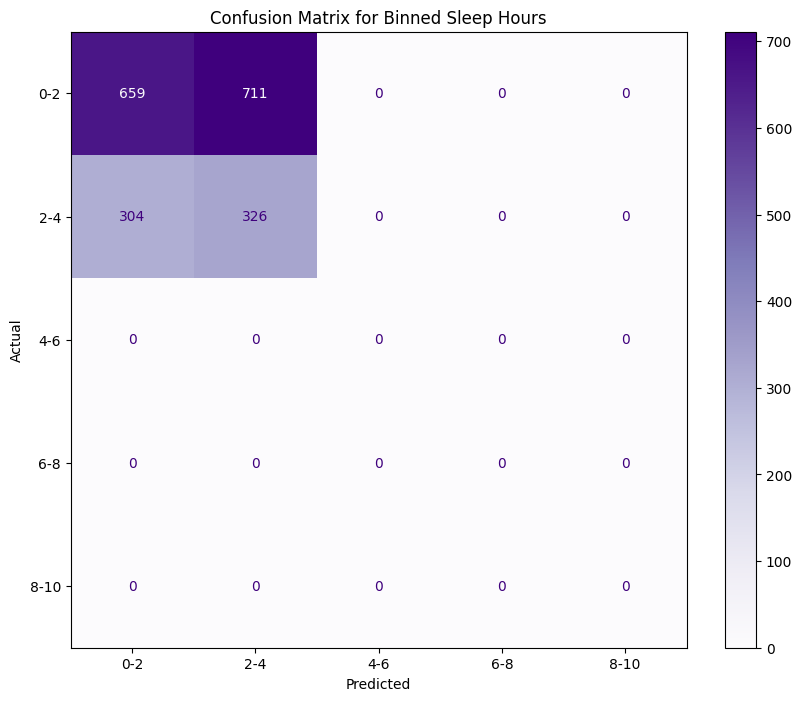

In [97]:
# Classification - Confusion Matrix
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']
y_test_clipped = pd.cut(y_test, bins=bins, labels=labels)
y_pred_clipped = pd.cut(y_pred, bins=bins, labels=labels)

# Convert to numeric
y_test_bins_numeric = pd.Categorical(y_test_clipped).codes
y_pred_bins_numeric = pd.Categorical(y_pred_clipped).codes

# Confusion matrix
conf_mat = confusion_matrix(y_test_bins_numeric, y_pred_bins_numeric, labels=range(len(labels)))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=labels)

plt.figure(figsize=(10, 8))
disp.plot(cmap='Purples', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix for Binned Sleep Hours")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()